In [1]:
##Formulate/ Outline the problem
# The problem is to classify different species of penguins

import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

import random
import numpy as np
seed=1
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
penguins = sns.load_dataset('penguins')
penguins['species']

unique_species = penguins['species'].unique()
print(f'Unique species {unique_species}')
penguins.head()

Unique species ['Adelie' 'Chinstrap' 'Gentoo']


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:


## Identify inputs and outputs
# Inputs are the columns in the dataset, 
# We will drop island since the unique species of penguins live on all 3 islands
# We will drop sex since the unique species of penguins are both male and female
# outputs are the predicted penguin species 

## Inputs: Columns of the dataset apart from island and sex
## Outputs: Predicted penguin species


In [4]:
## Prepare data

In [5]:
penguins['species'] = penguins['species'].astype('category')
penguins['species']

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: category
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']

In [6]:
penguins_filtered = penguins.drop(columns=['island', 'sex']).dropna()

In [7]:
penguins_features = penguins_filtered.drop(columns=['species'])

In [8]:
target = pd.get_dummies(penguins_filtered['species'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(penguins_features, target, test_size=0.2, random_state=0, shuffle=True, stratify=target)

In [10]:
## Choose a loss function and optimizer
# To do that we first need to define the model

In [11]:
def functional_model():
    inputs = keras.Input(shape=X_train.shape[1])
    hidden_layer = keras.layers.Dense(10, activation="relu")(inputs)
    output_layer = keras.layers.Dense(3, activation="softmax")(hidden_layer)
    model = keras.Model(inputs=inputs, outputs=output_layer, name = 'Functional')
    return model

def sequential_model():
    model = keras.Sequential(name = 'Sequential')
    model.add(keras.layers.Input(shape=X_train.shape[1]))
    model.add(keras.layers.Dense(10, activation="relu"))
    model.add(keras.layers.Dense(3, activation="softmax"))
    return model

model1 = sequential_model()
model2 = functional_model()
model1.summary()
model2.summary()

model = sequential_model()

Model: "Sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________
Model: "Functional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
 dense_3 (Dense)             (None, 3)  

In [12]:
model.compile(optimizer='adam', 
              loss=keras.losses.CategoricalCrossentropy())

## Train the model
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
9/9 [==============================] - 1s 2ms/step - loss: 523.1042
Epoch 2/10
9/9 [==============================] - 0s 2ms/step - loss: 439.7044
Epoch 3/10
9/9 [==============================] - 0s 1ms/step - loss: 368.6393
Epoch 4/10
9/9 [==============================] - 0s 1ms/step - loss: 296.7942
Epoch 5/10
9/9 [==============================] - 0s 1ms/step - loss: 220.1841
Epoch 6/10
9/9 [==============================] - 0s 1000us/step - loss: 146.3242
Epoch 7/10
9/9 [==============================] - 0s 1ms/step - loss: 68.4460
Epoch 8/10
9/9 [==============================] - 0s 1ms/step - loss: 19.0912
Epoch 9/10
9/9 [==============================] - 0s 1ms/step - loss: 15.8822
Epoch 10/10
9/9 [==============================] - 0s 1ms/step - loss: 8.5047


c:\Users\ngow210\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ngow210\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


3/3 [==============================] - 0s 3ms/step


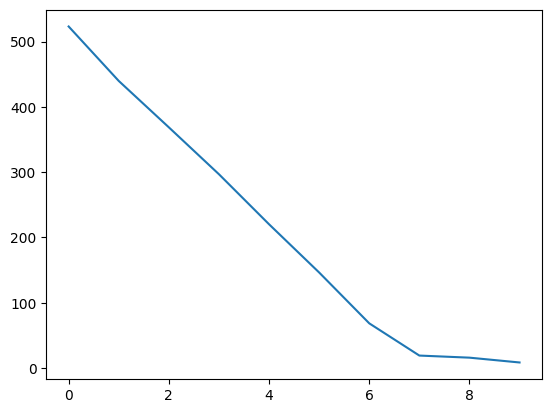

In [13]:
sns.lineplot(x=history.epoch, y=history.history['loss'])
y_pred = model.predict(X_test)

## Perform a Prediction/Classification
prediction = pd.DataFrame(y_pred, columns=target.columns)

In [14]:
prediction = pd.DataFrame(y_pred, columns=target.columns)
prediction

,Adelie,Chinstrap,Gentoo
0,7.971711e-03,3.666927e-23,9.920283e-01
1,1.000000e+00,1.538898e-11,3.244530e-09
2,9.992012e-01,6.078359e-16,7.987585e-04
3,9.999506e-01,3.531845e-18,4.931182e-05
4,1.000000e+00,9.735638e-11,3.131952e-12
...,...,...,...
64,8.446375e-01,1.553626e-01,7.779067e-21
65,9.998067e-01,1.933772e-04,9.426841e-17
66,9.999803e-01,1.970968e-05,1.116776e-16
67,9.119031e-01,5.453417e-22,8.809683e-02


In [15]:
predicted_species = prediction.idxmax(axis="columns")
true_species = y_test.idxmax(axis="columns")

[[28  1  1]
 [14  0  0]
 [11  0 14]]


<Axes: xlabel='Predicted Label', ylabel='True Label'>

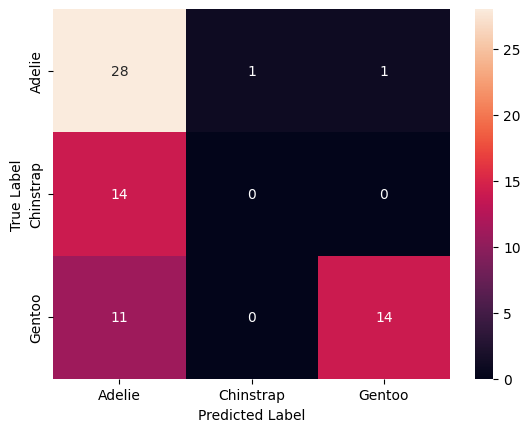

In [16]:
matrix = confusion_matrix(true_species, predicted_species)
print(matrix)

# Convert to a pandas dataframe
confusion_df = pd.DataFrame(matrix, 
                            index=y_test.columns.values, 
                            columns=y_test.columns.values)

# Set the names of the x and y axis, this helps with the readability of the heatmap.
confusion_df.index.name = 'True Label'
confusion_df.columns.name = 'Predicted Label'

sns.heatmap(confusion_df, annot=True)

In [17]:
## Measure Performance
from sklearn.metrics import accuracy_score
print(accuracy_score(true_species, predicted_species))

0.6086956521739131


In [18]:
## Tune Hyperparameters
# We will look at this step in the next lesson and skip it for now.


## Share/Deploy Model
# Save model
model.save('my_first_model')


# Load and use pretrained model
pretrained_model = keras.models.load_model('my_first_model')

# use the pretrained model here
y_pretrained_pred = pretrained_model.predict(X_test)
pretrained_prediction = pd.DataFrame(y_pretrained_pred, 
                                     columns=target.columns.values)

# idxmax will select the column for each row with the highest value
pretrained_pred_species = pretrained_prediction.idxmax(axis="columns")
print(pretrained_pred_species)

INFO:tensorflow:Assets written to: my_first_model\assets


INFO:tensorflow:Assets written to: my_first_model\assets


3/3 [==============================] - 0s 3ms/step
0     Gentoo
1     Adelie
2     Adelie
3     Adelie
4     Adelie
       ...  
64    Adelie
65    Adelie
66    Adelie
67    Adelie
68    Gentoo
Length: 69, dtype: category
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']
